# **-06-Basics-Fourier-Analysis-with-images**



© by A.Richter (under construction)

<img src=88x31.png  width="10%" style="float: left;"> 

**Preface:**

The Fourier-Transform is a tool for finding periodic pattern in signals. What can be interpreted as a signal was shown in Notebook-05 

## Overview of the notebook:

   1. [Mathematical review of the Fourier-Transformation](#review)
   2. [The Convolution Theorem](#conv)
   3. [Computational review - Characteristics of the Fourier-Transformation](#char)
   4. [FFT of a point-feature](#point)
   5. [FFT of a line-feature](#line)
   6. [FFT of a polygon-feature (rectangle)](#poly)
   7. [FFT of a rectangle with rotation](#rectrot)   
   8. [FFT of a circular-feature](#circ)
   9. [FFT of an elliptic-feature](#elliptic)
   10. [FFT of an image](#image)


In [1]:
# http://www.cbcity.de/die-fft-mit-python-einfach-erklaert
    
# http://www.magben.de/?h1=mathematik_fuer_ingenieure_mit_python&h2=fourier&h3=fourier_code

In extension of the Notebook -05-Basics-of-Signalprocessing I will discuss the Fourier Transform a little bit more in detail as it is one of the most important tools in data analysis.

## Mathmathecal review of the Fourier-Transformation <a name="review" ></a>

Fourier-Transformation is one of the most important and powerful tools in digital image processing. 
According to the definition found in  Bronstein, 1999, p. xxx the Fourier-Transformation $H(\omega)$ of the Function $h(t)$ is given by:

$$
H(\omega)= \int\limits_{ -  \infty }^{+ \infty}   {h(t) \cdot e^{-i\omega t}dt }=FT\left[h(t)\right]
$$

The inverse Transformation, to make $h(t)$ from $H(\omega)$ is given by:
$h(t)=\frac{1}{2\pi} \int\limits_{ -  \infty }^{+ \infty}   {H(\omega)e^{i\omega t}d\omega }= FT^{-1}\left[H(\omega)\right]
$


To understand the circumstances here you need a little bit calculus with complex numbers. 

Let's start with an easy example and choose **$h(t)$ an exponential function** and we will calculate demonstrative the Fourier-Transform $H(\omega)$.

$ h(t) = \beta e^{ - \alpha t}$  if $   {t \ge 0} $

$ 0$ if $ {t < 0}  $
  
 $e^{ix}  = \cos x + i\sin x $
 
 $e^{ - ix}  = \cos x - i\sin x$ 
   
 $H(f) = \int\limits_{ - \infty }^\infty  {h(t)e^{ - i2\pi ft} dt} $ 

$\omega  = 2\pi f$ 
 
$ H(\omega ) = \int\limits_{ - \infty }^\infty  {h(t)e^{ - i\omega t} dt} $ 

$ H(\omega ) = \int\limits_0^\infty  {\beta e^{ - \alpha t} e^{ - i\omega t} dt}  = \beta \int\limits_0^\infty  {e^{ - \alpha t - i\omega t} dt} $ 


$ H(\omega ) = \beta \int\limits_0^\infty  {e^{ - (\alpha  + i\omega )t} dt = } \beta \int\limits_0^\infty  {e^{ - at} dt} $  

$ a = \alpha  + i\omega  $ 

$\beta \int\limits_0^\infty  {e^{ - at} dt}  = \beta \left[ { - \frac{1}{a}e^{ - at} } \right]_0^\infty   = \beta \left[ {\underbrace { - \frac{1}{a}e^{ - \infty } }_{ = 0} + \frac{1}{a}e^0 } \right] = \frac{\beta }{a}$ 


$ \frac{\beta }{a} = \frac{\beta }{{\alpha  + i\omega }} \Rightarrow \frac{{\beta (\alpha  - i\omega )}}{{(\alpha  + i\omega )(\alpha  - i\omega )}} = \frac{{\beta \alpha  - i\beta \omega }}{{\alpha ^2  + \omega ^2 }} \\ 
  \Rightarrow \underbrace {\frac{{\beta \alpha }}{{\alpha ^2  + \omega ^2 }}}_{{\mathop{\rm Re}\nolimits} (\omega )} + i\underbrace {\frac{{( - \beta \omega )}}{{\alpha ^2  + \omega ^2 }}}_{{\mathop{\rm Im}\nolimits} (\omega )} \\ 
 \left| {H(\omega )} \right| = \sqrt {{\mathop{\rm Re}\nolimits} ^2 (\omega ) + {\mathop{\rm Im}\nolimits} ^2 (\omega )}  = \sqrt {\left( {\frac{{\beta \alpha }}{{\alpha ^2  + \omega ^2 }}} \right)^2  + \left( {\frac{{( - \beta \omega )}}{{\alpha ^2  + \omega ^2 }}} \right)^2 }  \\ 
 \left| {H(\omega )} \right| = \sqrt {\frac{{\beta ^2 \left( {\alpha ^2  + \omega ^2 } \right)}}{{\left( {\alpha ^2  + \omega ^2 } \right)^2 }}}  = \frac{\beta }{{\sqrt {\alpha ^2  + \omega ^2 } }} \\ 
 \Theta (\omega ) = \arctan \frac{{{\mathop{\rm Im}\nolimits} (\omega )}}{{{\mathop{\rm Re}\nolimits} (\omega )}} = \arctan \frac{{\left( {\frac{{( - \beta \omega )}}{{\alpha ^2  + \omega ^2 }}} \right)}}{{\left( {\frac{{\beta \alpha }}{{\alpha ^2  + \omega ^2 }}} \right)}} \\ 
 \Theta (\omega ) = \arctan \left( { - \frac{\omega }{\alpha }} \right) \\ 
  \Rightarrow H(\omega ) = \left| {H(\omega )} \right|e^{i\Theta (\omega )}  = \frac{\beta }{{\sqrt {\alpha ^2  + \omega ^2 } }}e^{i\arctan \left( { - \frac{\omega }{\alpha }} \right)} 
$





http://www.magben.de/?h1=mathematik_fuer_ingenieure_mit_python&h2=fourier&h3=fourier_code

In [1]:
import numpy as np

a     = 6
b     = 5.5
alpha = 0.1  
beta  = 1.5 

def fkt(t):
    "The example-function to be transformed"
    return a*np.exp(-alpha*t) - b*np.exp(-beta*t)

In [17]:
n = 1e5
t_max = 300
t = np.linspace(0., t_max, n+1)[:-1]
s = fkt(t)

/Users/richter/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


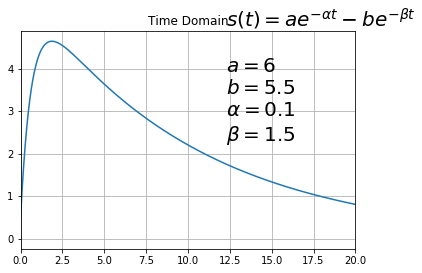

In [18]:
#import pylab as plt
import matplotlib.pyplot as plt
plt.figure()
plt.title("Time Domain")
plt.figtext(.6, .5, 
            r"$s(t) = a e^{-\alpha t}-b e^{-\beta t}$" "\n\n" +
            (r"$a = %G$" % a) + "\n" +
            (r"$b = %G$" % b) + "\n" +
            (r"$\alpha = %G$" % alpha) + "\n" +
            (r"$\beta = %G$" % beta),
            fontsize=20)
plt.plot(t,s)
plt.xlim(0,20)
plt.grid(True)

The Fourier-Transform fulfills the following properties:

It creates a chracteristic repetitive pattern in every direction/dimension of the frequency or the spatial/time domain.

There are four important Symmetries concerning the Fourier Transformation
Es gibt vier Symmetrien, die für die Fourier-Transformation von Bedeutung sind:

a) even $g(-x)=g(x)$

b) odd $g(-x)=-g(x)$

c) hermitic $g(-x)=g^*(x)$

d) antihermitic $g(-x)=-g^*(x)$


The Kernels of the Fourier-Transform are hermitic, which means that every function $g(x)$ can be separated in an even and an odd part of the function. The Fourier-Transform can be separated in the Cosine-Transform and the Sin-Transform.
 


## The Convolution Theorem <a name="conv" ></a>

The Fourier-Transformierte of an even/ odd Function is also even/ odd.  ($\otimes$ = convolution)

In the frequency domain I can write: $FT[g(t) \otimes f(t)] = FT[g(t)] \cdot FT[f(t)]$  

and therefore in the the time domain in the same way $g(t) \otimes f(t) = FT^{-1}\left[ FT[g(t)] \cdot FT[f(t)]\right]$


The Convolution Theorem states that a convolution in the time domain is the same as a Multiplication in the frequency domain and vice versa.

## Computational review - Characteristics of the Fourier-Transformation <a name="char" ></a>

From the comoutational point of view the these theoretical reviews are not very usefull because computer always calculate with discrete datasets. Therefor I have to analyse the discrete formalism of the Fourier equations. In will show some examples to understand how algorithms like the Fast Fourier Transform (FFT) work in detail. 

The formulas used to calculate the discrete version of the Fourier-Transform are shown here:
    
    
$a_k = \sum_{k=0}^{N-1} x_k \cdot e^{ \frac{2 \pi j k}{N}}$    
    
wherer $a_k$ is the Fourier-transformed result of the input $x_k$. N has to be chosen as the next higher exponent of 2 according to the size of the dataseries and $j$ is the complex element.

The so called Fast-Fourier-Transform (FFT) algorithm makes use of the properties from above, the symmetry, anti-symmetry and so on...  

Import of modules and libraries...

In [2]:
from skimage import exposure
from skimage import data,filters,feature
from skimage import io as skio

from scipy.misc import bytescale

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

Lets start with a very simple series of numbers from 0 to 7. 

So I can choose the number N according to result of a $2^n$ exponent. In the data I have 8 values so $N = 2^3 = 8$ is sufficient for this example. 

This gives me a form of the equation above like this: ....

    
$a_k = \sum_{k=0}^{8-1} x_k \cdot e^{ \frac{2 \pi j k}{8}}$    

$\rightarrow$
$a_k = \sum_{k=0}^{7} x_k \cdot e^{ \frac{2 \pi j k}{8}}$    


In [3]:
DataSeries=np.arange(8)
for element in DataSeries:  print(element) 

0
1
2
3
4
5
6
7


lets make a 1-d Fourier Transformation of this DataSeries by the given formulas and compare the results with the output of np.fft.fft()

Its 8 values in the series so N = 8

In [4]:
np.sum(DataSeries)

28

The sum of the original DataSeries is always the first value in the Fourier-Transformed Vector.

In [5]:
FTDataSeries=np.fft.fft(DataSeries)
for element in FTDataSeries:  print(element) 

(28+0j)
(-4+9.65685424949j)
(-4+4j)
(-4+1.65685424949j)
(-4+0j)
(-4-1.65685424949j)
(-4-4j)
(-4-9.65685424949j)


Concerning a two-dimensional input dataset like the numpy array below. The two dimensional Fourier-Transform is based on the one-dimensional Transform but for every dimension after each other:

In [6]:
A=np.array([[2,4,3,7],[1,2,3,4],[-2,4,5,7],[4,3,7,9]])
print(A)

[[ 2  4  3  7]
 [ 1  2  3  4]
 [-2  4  5  7]
 [ 4  3  7  9]]


In [7]:
print(np.sum(A[0,:]))
print(np.sum(A[1,:]))
print(np.sum(A[2,:]))
print(np.sum(A[3,:]))

16
10
14
23


...to be continued

In [8]:
FTA=np.fft.fft2(A)
print(FTA)

[[ 63. +0.j -13.+14.j -17. +0.j -13.-14.j]
 [  2.+13.j   2. -1.j   2. +1.j  10. -1.j]
 [ -3. +0.j  -3. -2.j -11. +0.j  -3. +2.j]
 [  2.-13.j  10. +1.j   2. -1.j   2. +1.j]]


## FFT of a point feature <a name="point" ></a>

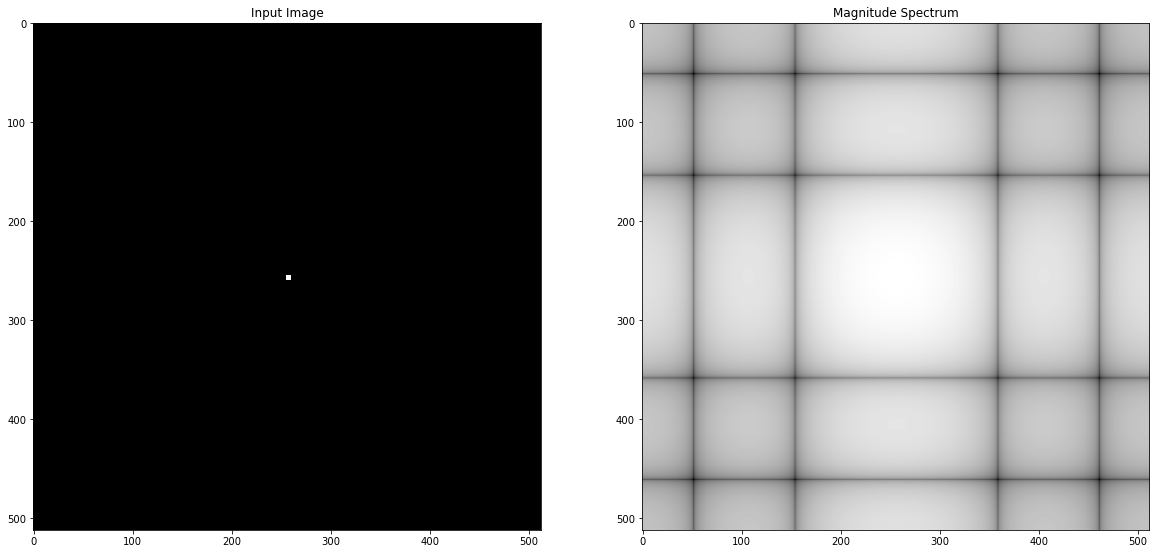

In [9]:
Img_Point=np.zeros((512,512),np.uint8)
#print Img_Line.shape

Img_Point[255:260,255:260]=255   # Change the Size (5x5 Pixels) of the dot 

Img_Pointfft=np.fft.fft2(Img_Point)
Img_Pointshift=np.fft.fftshift(Img_Pointfft)
Img_Point_m_spectrum = 100*np.log(np.abs(Img_Pointshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Point, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Point_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


## FFT of a line-feature <a name="line" ></a>

(512, 512)


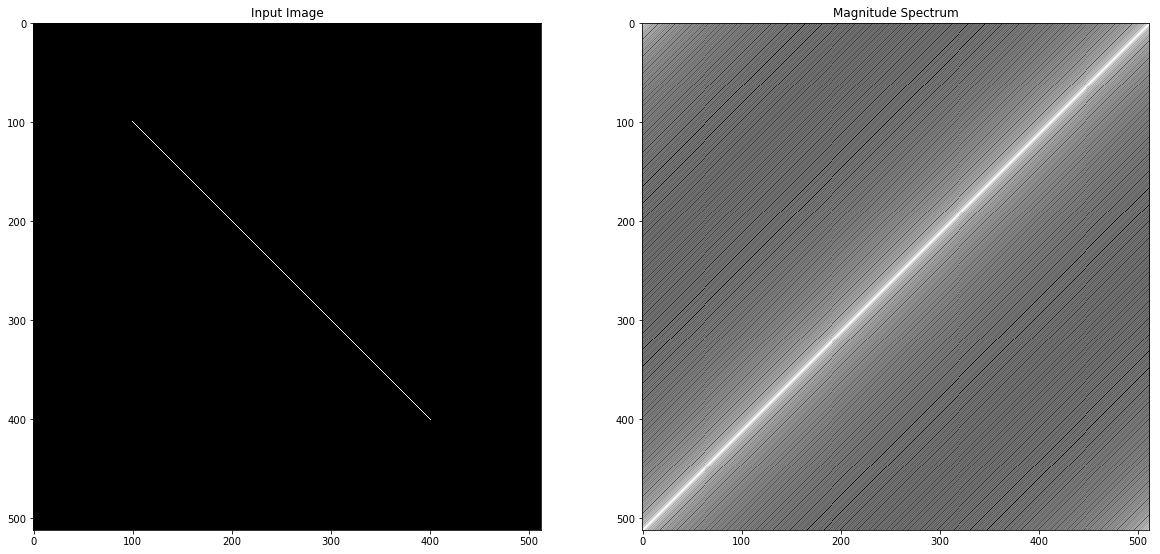

In [10]:
Img_Line=np.zeros((512,512),np.uint8)
#print Img_Line.shape
#plt.imshow(Img_Line,cmap='gray')
#plt.show()


cv2.line(Img_Line,(100,100),(400,400),(255,0,0),1)   # Ändern Sie die Dicke (=1 Pixel) und die Richtung der Linie
print( Img_Line.shape)
#plt.imshow(Img_Line,cmap='gray')
#plt.show()

Img_Linefft=np.fft.fft2(Img_Line)
Img_Lineshift=np.fft.fftshift(Img_Linefft)
Img_Line_m_spectrum = 100*np.log(np.abs(Img_Lineshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Line, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Line_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


## FFT of a polygon-feature (rectangle) <a name="poly" ></a>

(512, 512)


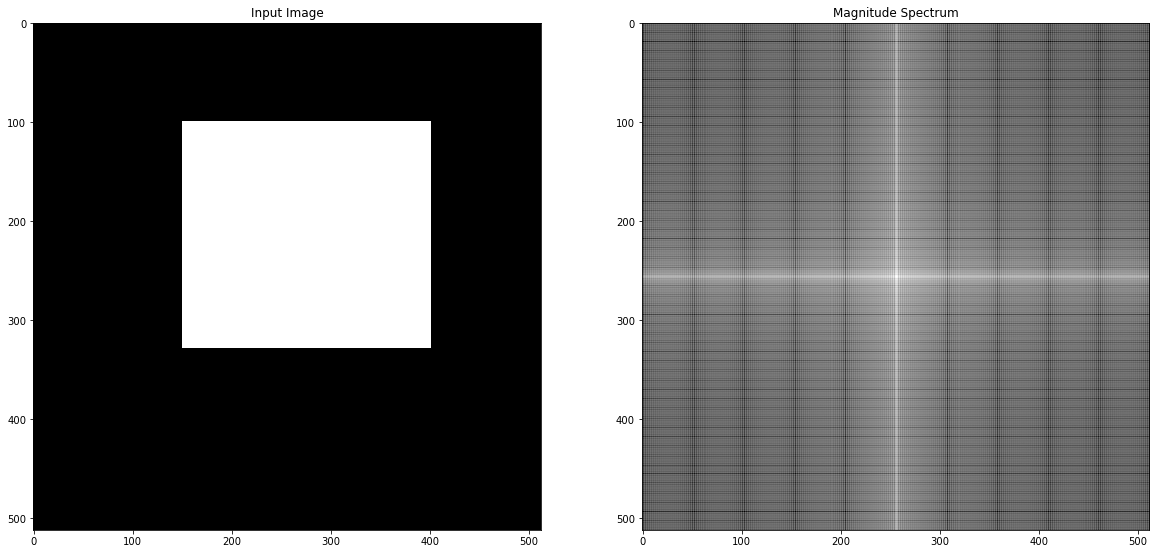

In [11]:
Img_Rec=np.zeros((512,512),np.uint8)
#print Img_Rec.shape
#plt.imshow(Img_Rec,cmap='gray')
#plt.show()


cv2.rectangle(Img_Rec,(150,100),(400,328),(255,255,255),-1 )  # Ändern Sie die Größe des Rechtecks 
print( Img_Rec.shape)
#plt.imshow(Img_Rec,cmap='gray')
#plt.show()

Img_Recfft=np.fft.fft2(Img_Rec)
Img_Recshift=np.fft.fftshift(Img_Recfft)
Img_Rec_m_spectrum = 100*np.log(np.abs(Img_Recshift))

plt.figure(figsize=(20,10))

plt.subplot(121),plt.imshow(Img_Rec, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Rec_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()

## FFT of a rectangle with rotation <a name="rectrot" ></a>

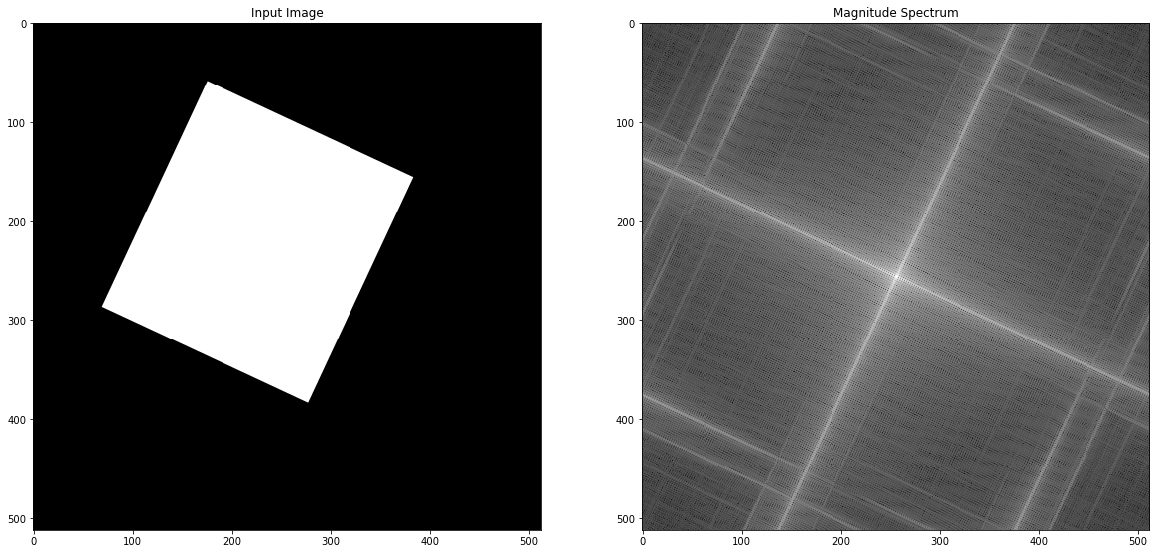

In [12]:
rows,cols = Img_Rec.shape
    
M = cv2.getRotationMatrix2D((cols/2,rows/2),65,1)    # Rotation um 65°, ändern Sie den Winkel 
Img_RecRot = cv2.warpAffine(Img_Rec,M,(cols,rows))

Img_RecRotfft=np.fft.fft2(Img_RecRot)
Img_RecRotshift=np.fft.fftshift(Img_RecRotfft)
Img_RecRot_m_spectrum = 100*np.log(np.abs(Img_RecRotshift))

plt.figure(figsize=(20,10))

plt.subplot(121),plt.imshow(Img_RecRot, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_RecRot_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


## FFT of a circular-feature <a name="circ" ></a>

(512, 512)


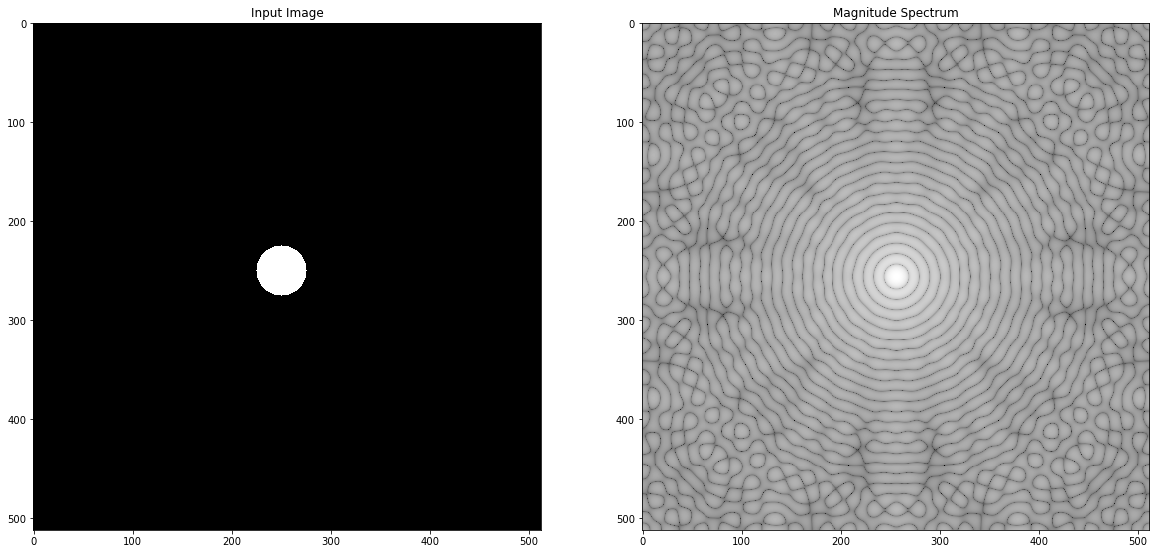

In [13]:
Img_Circ=np.zeros((512,512),np.uint8)
#print Img_Circ.shape
#plt.imshow(Img_Circ,cmap='gray')
#plt.show()


cv2.circle(Img_Circ,(250,250),25,(255,255,255),-1)     # Radius R=25 hier, vergrößern und Verkleinern Sie den Wert. 
print( Img_Circ.shape)
#plt.imshow(Img_Circ,cmap='gray')
#plt.show()

Img_Circfft=np.fft.fft2(Img_Circ)
Img_Circshift=np.fft.fftshift(Img_Circfft)
Img_Circ_m_spectrum = 100*np.log(np.abs(Img_Circshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Circ, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Circ_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()

## FFT of an elliptic-feature <a name="elliptic" ></a>

(512, 512)


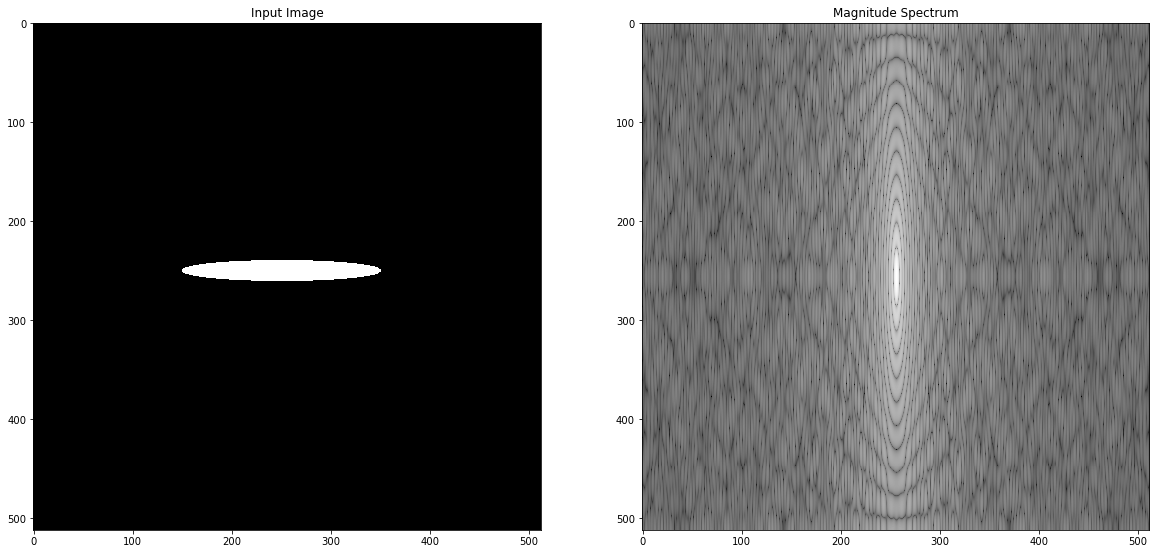

In [14]:
Img_Ell=np.zeros((512,512),np.uint8)
#print Img_Ell.shape
#plt.imshow(Img_Ell,cmap='gray')
#plt.show()


cv2.ellipse(Img_Ell,(250,250),(100,10),0,0,360,255,-1) # Ändern Sie kleine (10) und Große (100) Halbachese der Ellipse
print(Img_Ell.shape)
#plt.imshow(Img_Ell,cmap='gray')
#plt.show()


Img_Ellfft=np.fft.fft2(Img_Ell)
Img_Ellshift=np.fft.fftshift(Img_Ellfft)
Img_Ell_m_spectrum = 100*np.log(np.abs(Img_Ellshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(Img_Ell, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Img_Ell_m_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()

## FFT of an image <a name="image" ></a>

(620, 475)
rows:  620
cols:  475


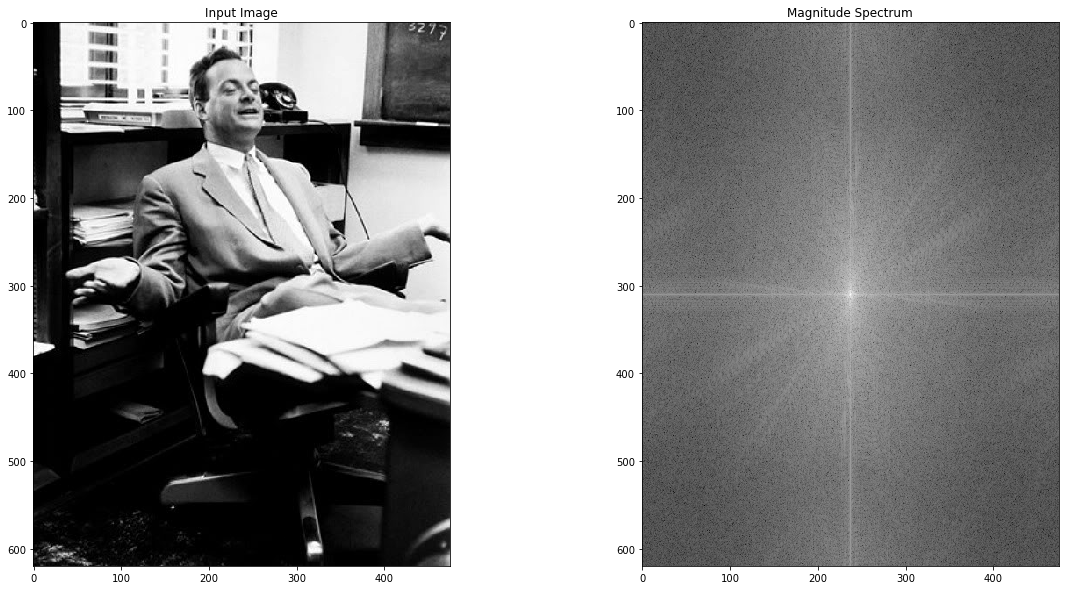

In [15]:
#img=skio.imread('doug.jpg')     # Testen Sie verschiedene Bilder
img=skio.imread('figures/feynman.png')

#Transformation in Frequenzraum

rows, cols = img.shape[0:2]
print( img.shape)
print( "rows: ", rows)
print("cols: ",cols)

imgfft=np.fft.fft2(img)
fimgshift=np.fft.fftshift(imgfft)
magnitude_spectrum = 100*np.log(np.abs(fimgshift))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()